In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

import pandas as pd

# Assuming 'final_merged_df' is your DataFrame that includes the 'league' column
leagues_to_remove = ['JAP-J1 League', 'RUS-League', 'AUT-Football Bundesliga', 'TUR-League']

# Filter the DataFrame to keep only the rows where 'league' is not in the list of leagues to remove
new_players_df = players_df[~players_df['league'].isin(leagues_to_remove)]

# Filter the DataFrame to include only rows where 'RB' or 'RWB' appears in 'main_pos' or '2nd_pos'
RB_df = new_players_df[(new_players_df['main_pos'].isin(['LB', 'LWB'])) | 
                                            (new_players_df['2nd_pos'].isin(['LB', 'LWB']))]

# Display the first few rows of the filtered DataFrame to verify
print(RB_df.head())


                league  season         team               player nation pos  \
13  ENG-Premier League    2324      Arsenal         Jakub Kiwior    POL  DF   
15  ENG-Premier League    2324      Arsenal       Jurriën Timber    NED  DF   
20  ENG-Premier League    2324      Arsenal  Oleksandr Zinchenko    UKR  DF   
22  ENG-Premier League    2324      Arsenal    Takehiro Tomiyasu    JPN  DF   
42  ENG-Premier League    2324  Aston Villa          Lucas Digne    FRA  DF   

   age    born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
13  23  2000.0  10.5             1  ...               0.0         523.0   
15  22  2001.0   0.8             0  ...               0.0          66.0   
20  26  1996.0  19.1             1  ...               0.0        1374.0   
22  24  1998.0  12.8             2  ...               0.0         574.0   
42  30  1993.0  26.8             1  ...               0.0        1015.0   

    Outcomes_Off  Outcomes_Blocks            League.6  Most_Frequent_Posit

In [2]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\new_full_team_stats.csv'

# Load the CSV file into a DataFrame
team_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(team_stats_df.head())


               league  season         team  players_used_misc  90s_misc  \
0  ENG-Premier League    2324      Arsenal                 25        38   
1  ENG-Premier League    2324  Aston Villa                 31        38   
2  ENG-Premier League    2324  Bournemouth                 30        38   
3  ENG-Premier League    2324    Brentford                 28        38   
4  ENG-Premier League    2324     Brighton                 30        38   

   Performance_CrdY_misc  Performance_CrdR_misc  Performance_2CrdY_misc  \
0                     64                      2                       1   
1                     94                      2                       0   
2                     79                      3                       0   
3                     89                      2                       0   
4                     90                      3                       0   

   Performance_Fls_misc  Performance_Fld_misc  ...  \
0                   391                   39

In [3]:
import pandas as pd

# Assuming CB_df is your DataFrame for centerbacks and team_stats_df is your DataFrame for team stats
# Ensure both dataframes have the 'league' and 'team' columns formatted similarly

# Merge the DataFrames on both 'league' and 'team' columns
RB_team_stats_df = pd.merge(RB_df, team_stats_df, on=['league', 'team'], suffixes=('', '_team'))

def filter_players_by_games_played(data, column, threshold):
    """ Filter out players who have played fewer games than the specified threshold. """
    filtered_df = data[data[column] >= threshold]
    return filtered_df

# Usage example, applying the filter
RB_team_stats_df = filter_players_by_games_played(RB_team_stats_df, '90s', 5)
print(RB_team_stats_df)


                 league  season             team               player nation  \
0    ENG-Premier League    2324          Arsenal         Jakub Kiwior    POL   
2    ENG-Premier League    2324          Arsenal  Oleksandr Zinchenko    UKR   
3    ENG-Premier League    2324          Arsenal    Takehiro Tomiyasu    JPN   
4    ENG-Premier League    2324      Aston Villa          Lucas Digne    FRA   
5    ENG-Premier League    2324      Aston Villa          Álex Moreno    ESP   
..                  ...     ...              ...                  ...    ...   
469          ARG-League    2324         Talleres        Juan Portillo    ARG   
471          ARG-League    2324         Talleres     Nicolás Pasquini    ARG   
473          ARG-League    2324            Tigre      Lautaro Montoya    ARG   
474          ARG-League    2324            Tigre     Sebastián Prieto    ARG   
475          ARG-League    2324  Vélez Sarsfield     Francisco Ortega    ARG   

    pos age    born   90s  Standard_Gls

In [4]:


# Correct column names if necessary
# Assume we correct them as follows if they are not found:
if 'Touches_Def 3rd_poss' not in RB_team_stats_df.columns or 'Touches_Mid 3rd_poss' not in RB_team_stats_df.columns:
    print("Column names are incorrect. Please verify the correct column names.")
    # You can rename or adjust the columns as needed here.

# Calculating the metrics
# Progressive distance per carry
RB_team_stats_df.loc[:, 'progressive_distance_per_carry'] = RB_team_stats_df['Carries_PrgDist'] / RB_team_stats_df['Carries_TotDist']

# Sum the individual player's touches in defensive and middle third
RB_team_stats_df.loc[:, 'total_player_touches_def_mid_third'] = RB_team_stats_df['Touches_Def 3rd'] + RB_team_stats_df['Touches_Mid 3rd']

# Sum the team's touches in defensive and middle third
RB_team_stats_df.loc[:, 'total_team_touches_def_mid_third'] = RB_team_stats_df['Touches_Def 3rd_poss'] + RB_team_stats_df['Touches_Mid 3rd_poss']

# Calculate the percentage of player's touches in the defensive or middle third per team touches in these zones
RB_team_stats_df.loc[:, 'touches_def_mid_third_per_team'] = (RB_team_stats_df['total_player_touches_def_mid_third'] / RB_team_stats_df['total_team_touches_def_mid_third']) * 100

# Progressive distance per pass
RB_team_stats_df.loc[:, 'progressive_distance_per_pass'] = RB_team_stats_df['Total_PrgDist'] / RB_team_stats_df['Total_Att']

# Percent of total passes per team passes
RB_team_stats_df.loc[:, 'percent_total_passes_per_team'] = (RB_team_stats_df['Total_Att'] / RB_team_stats_df['Total_Att_pass']) * 100

RB_team_stats_df.loc[:, 'progressive_passes_per_pass'] = (RB_team_stats_df['PrgP_pass'] / RB_team_stats_df['Total_Att']) 


In [5]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_progression(data, columns):
    """ Calculate Z-scores for log-transformed offensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_progression_score(data, columns, weights):
    """ Compute the weighted score for the 'Progression' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['progression_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['progression_score'].min()
    max_score = data['progression_score'].max()
    data['progression_score'] = ((data['progression_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

def prepare_final_df(original_df, score_df, score_column):
    """ Merge the calculated scores into the original DataFrame and ensure only relevant columns are included. """
    # Reset index if necessary to ensure 'player', 'team', and 'league' can be used as merge keys
    if 'player' not in score_df.columns or 'team' not in score_df.columns:
        score_df.reset_index(inplace=True)
    
    # Merge the scores and select only the relevant columns
    final_df = original_df[['player', 'team', 'league']].merge(score_df[['player', 'team', score_column]], on=['player', 'team'], how='left')
    return final_df

# Define columns and weights for offensive stats
progressive_columns = ['progressive_distance_per_carry', 'touches_def_mid_third_per_team', 'progressive_distance_per_pass', 'percent_total_passes_per_team', 'Total_Cmp%', 'progressive_passes_per_pass']
weights_progression = np.array([0.25, 0.15, 0.25, 0.10, 0.20, 0.05])  # Adjust weights as necessary, ensuring they sum to 1

# Assuming RB_team_stats_df is preloaded with your data
# Cap extreme values
RB_team_stats_df = cap_extreme_values(RB_team_stats_df, progressive_columns)

# Apply log transformation
RB_team_stats_df = log_transform(RB_team_stats_df, progressive_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in progressive_columns]
scores_df_progressive = calculate_z_scores_progression(RB_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_progressive = compute_progression_score(scores_df_progressive, log_transformed_columns, weights_progression)

# Prepare the final DataFrame for output
RB_scores_df = prepare_final_df(RB_team_stats_df, scores_df_progressive, 'progression_score')

# Display the DataFrame to check the results
print(RB_scores_df.head())


                player         team              league  progression_score
0         Jakub Kiwior      Arsenal  ENG-Premier League          72.855986
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League          73.403433
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League          52.065713
3          Lucas Digne  Aston Villa  ENG-Premier League          57.543685
4          Álex Moreno  Aston Villa  ENG-Premier League          34.441992


In [6]:
# Drop duplicates based on 'team', 'player', and 'league' columns
RB_scores_df = RB_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(RB_scores_df.head())


                player         team              league  progression_score
0         Jakub Kiwior      Arsenal  ENG-Premier League          72.855986
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League          73.403433
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League          52.065713
3          Lucas Digne  Aston Villa  ENG-Premier League          57.543685
4          Álex Moreno  Aston Villa  ENG-Premier League          34.441992


In [7]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_progressors = view_top_players(RB_scores_df, 'progression_score')
print(top_progressors)


                      player           team          league  progression_score
257                     Renê  Internacional      BRA-League         100.000000
100           Theo Hernández          Milan     ITA-Serie A          96.067649
116         Jonas Föhrenbach     Heidenheim  GER-Bundesliga          95.686482
295   Rafael Marcelo Delgado          Colón      ARG-League          90.761500
314            Juan Portillo       Talleres      ARG-League          90.684380
311                Enzo Díaz    River Plate      ARG-League          90.539947
292              Frank Fabra   Boca Juniors      ARG-League          90.414552
317         Sebastián Prieto          Tigre      ARG-League          90.023507
178  Anselmo García MacNulty         Zwolle  NED-Eredivisie          87.928716
305        Juan Sánchez Miño          Lanús      ARG-League          87.862399


In [8]:
# Calculate clearances per 100 opposition touches in the attacking third
if 'Clr' in RB_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['clearances_per_100_opp_touch_in_att_3rd'] = (RB_team_stats_df['Clr'] / RB_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

# Calculate blocks per 100 opposition touches in the attacking third
if 'Blocks_Sh' in RB_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['blocks_per_100_opp_touch_in_att_3rd'] = (RB_team_stats_df['Blocks_Sh'] / RB_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

# Calculate tackles and interceptions per 100 opposition touches in the attacking third
if 'Tkl+Int' in RB_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['tkl_and_int_per_100_opp_touch_in_att_3rd'] = (RB_team_stats_df['Tkl+Int'] / RB_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

# Calculate tackles and interceptions per 100 opposition touches in the attacking third
if 'Tkl+Int' in RB_team_stats_df.columns and 'Touches_Mid 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['tkl_and_int_per_100_opp_touch_in_mid_3rd'] = (RB_team_stats_df['Tkl+Int'] / RB_team_stats_df['Touches_Mid 3rd_allowed_poss']) * 100

# Calculate blocks per 100 opposition touches in the attacking third
if 'Blocks_Pass' in RB_team_stats_df.columns and 'Touches_Mid 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['blocks_per_100_opp_touch_in_mid_3rd'] = (RB_team_stats_df['Blocks_Pass'] / RB_team_stats_df['Touches_Mid 3rd_allowed_poss']) * 100

In [9]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_defensive(data, columns):
    """ Calculate Z-scores for log-transformed defensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_defensive_score(data, columns, weights):
    """ Compute the weighted score for defensive metrics, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['defensive_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['defensive_score'].min()
    max_score = data['defensive_score'].max()
    data['defensive_score'] = ((data['defensive_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for defensive stats
defensive_columns = ['clearances_per_100_opp_touch_in_att_3rd', 'blocks_per_100_opp_touch_in_att_3rd', 'tkl_and_int_per_100_opp_touch_in_att_3rd', 'tkl_and_int_per_100_opp_touch_in_mid_3rd', 'blocks_per_100_opp_touch_in_mid_3rd']
weights_defensive = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

# Assuming RB_team_stats_df is preloaded with your data
# Cap extreme values
RB_team_stats_df = cap_extreme_values(RB_team_stats_df, defensive_columns)

# Apply log transformation
RB_team_stats_df = log_transform(RB_team_stats_df, defensive_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in defensive_columns]
scores_df_defensive = calculate_z_scores_defensive(RB_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_defensive = compute_defensive_score(scores_df_defensive, log_transformed_columns, weights_defensive)

# Reset index if necessary and merge the scores
if 'player' not in RB_scores_df.columns or 'team' not in RB_scores_df.columns:
    RB_scores_df.reset_index(inplace=True)

if 'player' not in scores_df_defensive.columns or 'team' not in scores_df_defensive.columns:
    scores_df_defensive.reset_index(inplace=True)

RB_scores_df = RB_scores_df.merge(scores_df_defensive[['player', 'team', 'defensive_score']], on=['player', 'team'], how='left')

# Print the updated DataFrame to check the results
print(RB_scores_df.head())


                player         team              league  progression_score  \
0         Jakub Kiwior      Arsenal  ENG-Premier League          72.855986   
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League          73.403433   
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League          52.065713   
3          Lucas Digne  Aston Villa  ENG-Premier League          57.543685   
4          Álex Moreno  Aston Villa  ENG-Premier League          34.441992   

   defensive_score  
0        54.098559  
1        72.164738  
2        58.574241  
3        73.938834  
4        51.239028  


In [10]:
# Drop duplicates based on 'team', 'player', and 'league' columns
RB_scores_df = RB_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(RB_scores_df.head())


                player         team              league  progression_score  \
0         Jakub Kiwior      Arsenal  ENG-Premier League          72.855986   
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League          73.403433   
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League          52.065713   
3          Lucas Digne  Aston Villa  ENG-Premier League          57.543685   
4          Álex Moreno  Aston Villa  ENG-Premier League          34.441992   

   defensive_score  
0        54.098559  
1        72.164738  
2        58.574241  
3        73.938834  
4        51.239028  


In [11]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_defenders = view_top_players(RB_scores_df, 'defensive_score')
print(top_defenders)


                     player           team              league  \
110                Bernardo         Bochum      GER-Bundesliga   
311               Enzo Díaz    River Plate          ARG-League   
302            Ayrton Costa  Independiente          ARG-League   
51            Sergi Cardona     Las Palmas         ESP-La Liga   
243                  Marlon       Cruzeiro          BRA-League   
16         Antonee Robinson         Fulham  ENG-Premier League   
121  Maximilian Mittelstädt      Stuttgart      GER-Bundesliga   
163          Calvin Verdonk   NEC Nijmegen      NED-Eredivisie   
144       Frederic Guilbert     Strasbourg         FRA-Ligue 1   
126                 Ismaily          Lille         FRA-Ligue 1   

     progression_score  defensive_score  
110          67.734159       100.000000  
311          90.539947        97.584329  
302          68.569167        97.531309  
51           80.953729        97.238662  
243          85.579852        97.117742  
16           74.56376

In [12]:
RB_scores_df

,player,team,league,progression_score,defensive_score
0,Jakub Kiwior,Arsenal,ENG-Premier League,72.855986,54.098559
1,Oleksandr Zinchenko,Arsenal,ENG-Premier League,73.403433,72.164738
2,Takehiro Tomiyasu,Arsenal,ENG-Premier League,52.065713,58.574241
3,Lucas Digne,Aston Villa,ENG-Premier League,57.543685,73.938834
4,Álex Moreno,Aston Villa,ENG-Premier League,34.441992,51.239028
...,...,...,...,...,...
314,Juan Portillo,Talleres,ARG-League,90.684380,82.835363
315,Nicolás Pasquini,Talleres,ARG-League,52.354516,23.874461
316,Lautaro Montoya,Tigre,ARG-League,44.576968,57.007506
317,Sebastián Prieto,Tigre,ARG-League,90.023507,82.118262


In [13]:
import pandas as pd

# Assuming RB_team_stats_df is already defined and includes all the necessary columns

# Calculate xG per 90
if 'Expected_xG' in RB_team_stats_df.columns and '90s' in RB_team_stats_df.columns:
    RB_team_stats_df['xG_per_90'] = (RB_team_stats_df['Expected_xG'] / RB_team_stats_df['90s'])

# Calculate xA per 90
if 'Expected_xA' in RB_team_stats_df.columns and '90s' in RB_team_stats_df.columns:
    RB_team_stats_df['xA_per_90'] = (RB_team_stats_df['Expected_xA'] / RB_team_stats_df['90s'])

# Calculate Key Passes per 100 touches in the attacking third
if 'KP' in RB_team_stats_df.columns and 'Touches_Att 3rd_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['KP_per_100_touches_att_3rd'] = (RB_team_stats_df['KP'] / RB_team_stats_df['Touches_Att 3rd_poss']) * 100

# Calculate Shot Creating Actions per 100 touches in the attacking third
if 'SCA_SCA' in RB_team_stats_df.columns and 'Touches_Att 3rd_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['SCA_per_100_touches_att_3rd'] = (RB_team_stats_df['SCA_SCA'] / RB_team_stats_df['Touches_Att 3rd_poss']) * 100

# Calculate passes and carries into the penalty area per 100 touches in the final third
if 'Carries_CPA' in RB_team_stats_df.columns and 'PPA' in RB_team_stats_df.columns and 'Touches_Att 3rd_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['PA_and_carries_per_100_touches_final_3rd'] = ((RB_team_stats_df['Carries_CPA'] + RB_team_stats_df['PPA']) / RB_team_stats_df['Touches_Att 3rd_poss']) * 100

# Display the first few rows to verify the calculations
print(RB_team_stats_df[['xG_per_90', 'xA_per_90', 'KP_per_100_touches_att_3rd', 'SCA_per_100_touches_att_3rd', 'PA_and_carries_per_100_touches_final_3rd']].head())


   xG_per_90  xA_per_90  KP_per_100_touches_att_3rd  \
0   0.076190   0.057143                    0.070093   
2   0.031414   0.151832                    0.338785   
3   0.117188   0.062500                    0.070093   
4   0.041045   0.134328                    0.677780   
5   0.095652   0.086957                    0.201502   

   SCA_per_100_touches_att_3rd  PA_and_carries_per_100_touches_final_3rd  
0                     0.151869                                  0.105140  
2                     0.782710                                  0.654206  
3                     0.198598                                  0.151869  
4                     1.355560                                  0.696098  
5                     0.403004                                  0.421323  


In [14]:
import pandas as pd
import numpy as np

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def calculate_z_scores_offensive(data, columns):
    """ Calculate Z-scores for log-transformed offensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_attacking_score(data, columns, weights):
    """ Compute the weighted score for the 'Attacking Right Back' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['attacking_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['attacking_score'].min()
    max_score = data['attacking_score'].max()
    data['attacking_score'] = ((data['attacking_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for offensive stats
offensive_columns = ['xG_per_90', 'xA_per_90', 'KP_per_100_touches_att_3rd', 'SCA_per_100_touches_att_3rd', 'PA_and_carries_per_100_touches_final_3rd']
weights_offensive = np.array([0.10, 0.15, 0.25, 0.25, 0.25])

# Assuming RB_team_stats_df is preloaded with your data
# Cap extreme values
RB_team_stats_df = cap_extreme_values(RB_team_stats_df, offensive_columns)

# Apply log transformation
RB_team_stats_df = log_transform(RB_team_stats_df, offensive_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in offensive_columns]
scores_df_offensive = calculate_z_scores_offensive(RB_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_offensive = compute_attacking_score(scores_df_offensive, log_transformed_columns, weights_offensive)

# Reset index if necessary and merge the scores
if 'player' not in RB_scores_df.columns or 'team' not in RB_scores_df.columns:
    RB_scores_df.reset_index(inplace=True)

if 'player' not in scores_df_offensive.columns or 'team' not in scores_df_offensive.columns:
    scores_df_offensive.reset_index(inplace=True)

RB_scores_df = RB_scores_df.merge(scores_df_offensive[['player', 'team', 'attacking_score']], on=['player', 'team'], how='left')

# Print the updated DataFrame to check the results
print(RB_scores_df.head())


                player         team              league  progression_score  \
0         Jakub Kiwior      Arsenal  ENG-Premier League          72.855986   
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League          73.403433   
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League          52.065713   
3          Lucas Digne  Aston Villa  ENG-Premier League          57.543685   
4          Álex Moreno  Aston Villa  ENG-Premier League          34.441992   

   defensive_score  attacking_score  
0        54.098559        29.822621  
1        72.164738        73.508682  
2        58.574241        36.001892  
3        73.938834        83.113627  
4        51.239028        59.038794  


In [15]:
# Drop duplicates based on 'team', 'player', and 'league' columns
RB_scores_df = RB_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(RB_scores_df.head())


                player         team              league  progression_score  \
0         Jakub Kiwior      Arsenal  ENG-Premier League          72.855986   
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League          73.403433   
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League          52.065713   
3          Lucas Digne  Aston Villa  ENG-Premier League          57.543685   
4          Álex Moreno  Aston Villa  ENG-Premier League          34.441992   

   defensive_score  attacking_score  
0        54.098559        29.822621  
1        72.164738        73.508682  
2        58.574241        36.001892  
3        73.938834        83.113627  
4        51.239028        59.038794  


In [16]:
# Columns that contain scores
score_columns = ['progression_score', 'defensive_score', 'attacking_score']

# Round each score column to two decimal places
for column in score_columns:
    if column in RB_scores_df.columns:
        RB_scores_df[column] = RB_scores_df[column].round(2)

# Display the DataFrame to verify the changes
print(RB_scores_df.head())


                player         team              league  progression_score  \
0         Jakub Kiwior      Arsenal  ENG-Premier League              72.86   
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League              73.40   
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League              52.07   
3          Lucas Digne  Aston Villa  ENG-Premier League              57.54   
4          Álex Moreno  Aston Villa  ENG-Premier League              34.44   

   defensive_score  attacking_score  
0            54.10            29.82  
1            72.16            73.51  
2            58.57            36.00  
3            73.94            83.11  
4            51.24            59.04  


In [17]:
import pandas as pd
import numpy as np
import re

# Create a new column called 'age' in CB_scores
RB_scores_df['age'] = None

# Loop through each row in CB_scores
for index, row in RB_scores_df.iterrows():
    # Get the team and player name from the current row
    team = row['team']
    player = row['player']

    # Find the matching player in the players_df
    matching_player = players_df[(players_df['team'] == team) & (players_df['player'] == player)]

    # If a matching player is found, update the 'age' column in CB_scores
    if not matching_player.empty:
        RB_scores_df.loc[index, 'age'] = matching_player['age'].values[0]

import pandas as pd
import re

# Assuming your DataFrame is named 'df'
RB_scores_df['age'] = RB_scores_df['age'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if pd.notnull(x) else x)

# Print the CB_scores DataFrame to verify
print(RB_scores_df)

                  player             team              league  \
0           Jakub Kiwior          Arsenal  ENG-Premier League   
1    Oleksandr Zinchenko          Arsenal  ENG-Premier League   
2      Takehiro Tomiyasu          Arsenal  ENG-Premier League   
3            Lucas Digne      Aston Villa  ENG-Premier League   
4            Álex Moreno      Aston Villa  ENG-Premier League   
..                   ...              ...                 ...   
314        Juan Portillo         Talleres          ARG-League   
315     Nicolás Pasquini         Talleres          ARG-League   
316      Lautaro Montoya            Tigre          ARG-League   
317     Sebastián Prieto            Tigre          ARG-League   
318     Francisco Ortega  Vélez Sarsfield          ARG-League   

     progression_score  defensive_score  attacking_score  age  
0                72.86            54.10            29.82   23  
1                73.40            72.16            73.51   26  
2                52.07     

In [18]:
import pandas as pd
import subprocess

# Assuming RB_scores_df is defined elsewhere in your notebook
RB_scores_df.to_csv('Left Back Role Scores.csv', index=False)

def run_command(command):
    result = subprocess.run(command, shell=True, text=True, capture_output=True)
    if result.stderr:
        print("Error:", result.stderr)
    else:
        print("Output:", result.stdout)

# Properly quote the filename to handle spaces
run_command('git add "Left Back Role Scores.csv"')
run_command('git commit -m "Add or update Left Back Role Scores.csv"')

# Make sure the branch 'main' exists by checking your GitHub repo or by running 'git branch' locally.
run_command('git push origin main')  # Adjust branch name if necessary


Output: 
Output: [main 8ae3811] Add or update Left Back Role Scores.csv
 1 file changed, 318 insertions(+), 319 deletions(-)

Error: To https://github.com/Jbuck1016/Player-Recommendation-System.git
   2f5265f..8ae3811  main -> main



In [19]:
import subprocess

def run_command(command):
    result = subprocess.run(command, shell=True, text=True, capture_output=True)
    if result.stderr:
        print("Error:", result.stderr)
    else:
        print("Output:", result.stdout)

# Add, commit, pull, and then push
run_command('git add "creating left back scores.ipynb"')
run_command('git commit -m "Update notebook with latest changes"')
run_command('git pull origin main')  # Pull before pushing to ensure the local repo is up-to-date
run_command('git push origin main')  # Adjust branch name if necessary


Error: warning: in the working copy of 'Player Metrics/Left Backs/creating left back scores.ipynb', LF will be replaced by CRLF the next time Git touches it

Output: [main 1afa428] Update notebook with latest changes
 1 file changed, 33 insertions(+), 16 deletions(-)

Error: From https://github.com/Jbuck1016/Player-Recommendation-System
 * branch            main       -> FETCH_HEAD

Error: To https://github.com/Jbuck1016/Player-Recommendation-System.git
   8ae3811..1afa428  main -> main



In [20]:
RB_scores_df.to_csv('Left Back Role Scores.csv', index=False)

C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


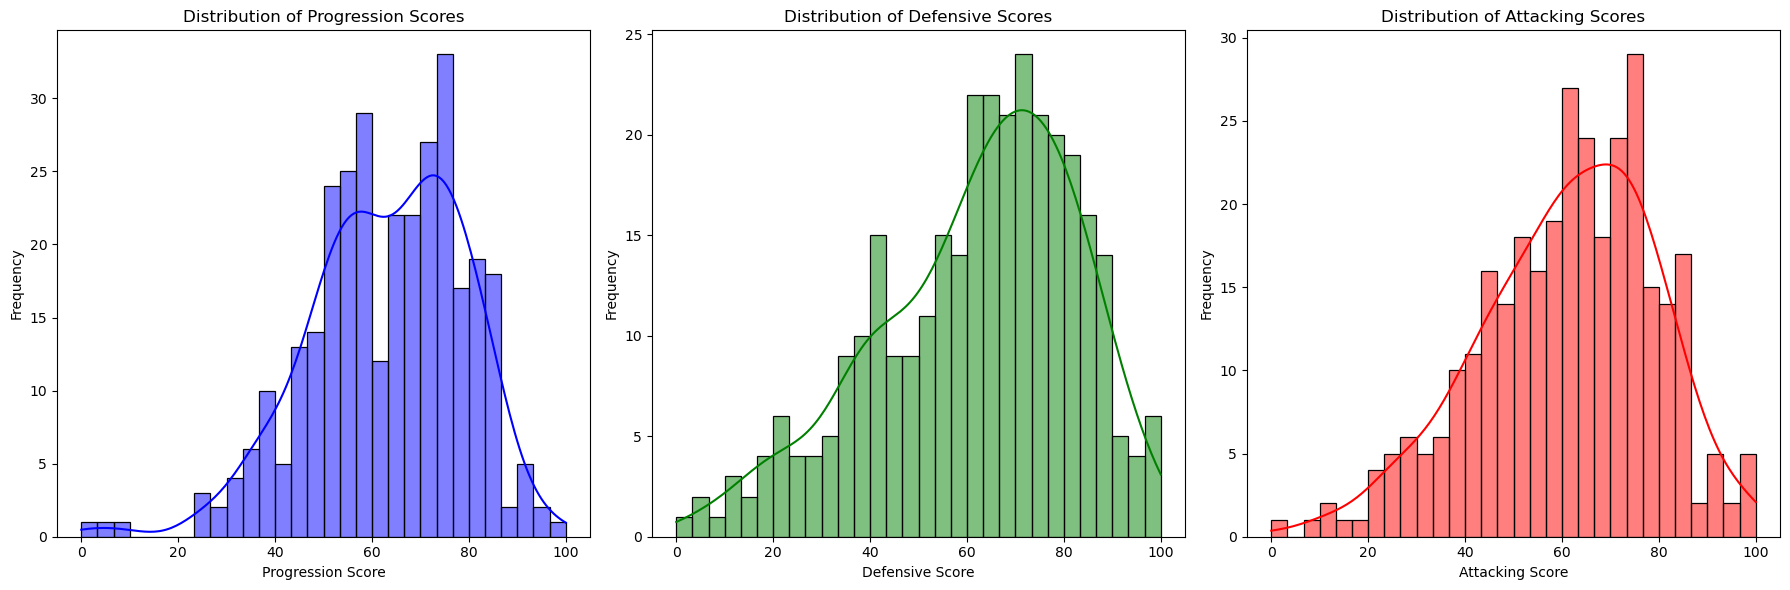

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RB_scores_df already contains 'progression_score', 'defensive_score', and 'attacking_score'
# Plotting the distribution of scores

plt.figure(figsize=(18, 6))

# Progression Score
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(RB_scores_df['progression_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Progression Scores')
plt.xlabel('Progression Score')
plt.ylabel('Frequency')

# Defensive Score
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(RB_scores_df['defensive_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Defensive Scores')
plt.xlabel('Defensive Score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(RB_scores_df['attacking_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Attacking Scores')
plt.xlabel('Attacking Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [22]:
# Display descriptive statistics for the three score columns
descriptive_statistics = RB_scores_df[['progression_score', 'defensive_score', 'attacking_score']].describe()
print(descriptive_statistics)


       progression_score  defensive_score  attacking_score
count         318.000000       318.000000       318.000000
mean           63.085629        61.932484        60.990063
std            16.034933        20.701559        18.348868
min             0.000000         0.000000         0.000000
25%            52.592500        49.047500        49.072500
50%            64.520000        65.415000        62.775000
75%            75.282500        77.380000        74.140000
max           100.000000       100.000000       100.000000


In [23]:
def custom_scale(score, threshold=0.8, max_scale=100):
    """ Scale scores such that only scores above a certain threshold reach near the maximum of the scale. """
    if score < threshold:
        return (score / threshold) * (max_scale * 0.5)  # Scale to half of the maximum if below threshold
    else:
        return 50 + ((score - threshold) / (1 - threshold)) * 50  # Scale from 50 to 100 if above threshold

# Apply custom scaling to each score
RB_scores_df['progression_score_scaled'] = RB_scores_df['progression_score'].apply(lambda x: custom_scale(x, threshold=0.8))
RB_scores_df['defensive_score_scaled'] = RB_scores_df['defensive_score'].apply(lambda x: custom_scale(x, threshold=0.8))
RB_scores_df['attacking_score_scaled'] = RB_scores_df['attacking_score'].apply(lambda x: custom_scale(x, threshold=0.8))
